# Principal Components Analysis on American University Rankings Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1. Load the Dataset

In [13]:
# Load the dataset

universities_df = pd.read_csv("/Users/mohitphulwani/Downloads/dmba/Universities.csv")
universities_df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


## 2. 4.2.a Remove Categorical Variables and Clean Missing Data

In [15]:
# Keep only numerical columns
numerical_df = universities_df.select_dtypes(include=['number'])

# Drop rows with missing values
cleaned_df = numerical_df.dropna()

# Show shape of cleaned data
cleaned_df.shape

(471, 18)

## 3. 4.2.b Principal Component Analysis (PCA)

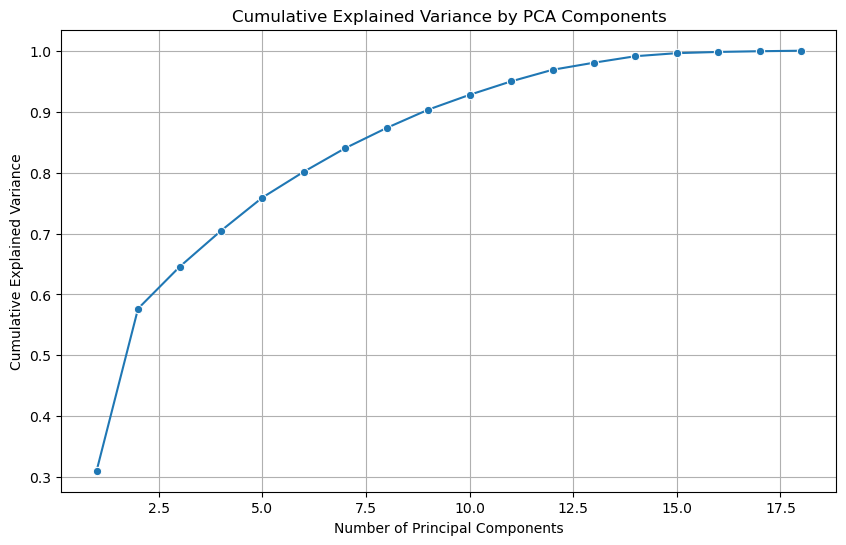

In [17]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1), 
             y=pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Component Loadings

In [19]:
# PCA loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(cleaned_df.columns))], 
                        index=cleaned_df.columns)
loadings[['PC1', 'PC2']].sort_values(by='PC1', ascending=False)

,PC1,PC2
stud./fac. ratio,0.283592,-0.030719
# FT undergrad,0.209688,0.371112
# PT undergrad,0.196632,0.205937
# new stud. enrolled,0.190780,0.381118
estim. personal $,0.180449,0.072825
# appl. accepted,0.139203,0.393314
# appli. rec'd,0.088247,0.405724
add. fees,0.082594,0.149376
estim. book costs,-0.030268,0.074315
% fac. w/PHD,-0.136240,0.291894


### Discussion
- **Normalization** is necessary because features are on different scales (e.g., tuition vs. graduation rate).
- **PC1** may represent financial and academic input dimensions (like tuition, expenses, and faculty resources).
- **PC2** could represent accessibility and scale (like student-faculty ratio or size).
- The cumulative explained variance plot helps determine how many components to retain (e.g., enough to explain ~85-90% variance).